In [5]:
#! pip install Ensembl_converter

In [1]:
import pandas as pd
from Ensembl_converter import EnsemblConverter
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
tpm = pd.read_csv('/mnt/xomics/tabear/atlas_paper/transcriptome/isoquant/00_aln.sorted/00_aln.sorted.gene_tpm.tsv', sep = '\t')
tpm.head()

,#feature_id,TPM
0,ENSG00000000457.14,25.898041
1,ENSG00000000460.17,1.253131
2,ENSG00000000938.13,1.044276
3,ENSG00000000971.16,7.309931
4,ENSG00000001460.18,43.441875


In [7]:

# Create an instance of EnsemblConverter
converter = EnsemblConverter()

# Provide a list of Ensembl IDs
ensembl_ids = tpm['#feature_id'].to_list()
ensembl_ids = [i.split('.')[0] for i in ensembl_ids]

# Convert Ensembl IDs to gene symbols
result = converter.convert_ids(ensembl_ids)

# Print the resulting DataFrame
print(result)

                  ENSG           Symbol
0      ENSG00000000457            SCYL3
1      ENSG00000000460            FIRRM
2      ENSG00000000938              FGR
3      ENSG00000000971              CFH
4      ENSG00000001460            STPG1
...                ...              ...
17631  ENSG00000215580           BCORP1
17632  ENSG00000229236           TTTY10
17633  ENSG00000260197  ENSG00000260197
17634  ENSG00000278212  ENSG00000278212
17635  ENSG00000288049  ENSG00000288049

[17636 rows x 2 columns]


In [8]:
tpm['gene'] = result['Symbol']

In [9]:
tpm.to_csv('gene_tpm.tsv', sep = '\t')

In [10]:
tpm.head()

,#feature_id,TPM,gene
0,ENSG00000000457.14,25.898041,SCYL3
1,ENSG00000000460.17,1.253131,FIRRM
2,ENSG00000000938.13,1.044276,FGR
3,ENSG00000000971.16,7.309931,CFH
4,ENSG00000001460.18,43.441875,STPG1


In [11]:
protein_trypsin = pd.read_csv('/mnt/xomics/tabear/atlas_paper/proteome/lrp_isoquant/16a_MSFragger_trypsin/protein.tsv', sep = '\t')
protein_trypsin['Protein Description'] = protein_trypsin['Protein Description'].str.split('=').str[1]

protein_chymotrypsin = pd.read_csv('/mnt/xomics/tabear/atlas_paper/proteome/lrp_isoquant/16b_MSFragger_chymotrypsin/protein.tsv', sep = '\t')
protein_chymotrypsin['Protein Description'] = protein_chymotrypsin['Protein Description'].str.split('=').str[1]

protein_aspnlysc = pd.read_csv('/mnt/xomics/tabear/atlas_paper/proteome/lrp_isoquant/16c_MSFragger_aspnlysc/protein.tsv', sep = '\t')
protein_aspnlysc['Protein Description'] = protein_aspnlysc['Protein Description'].str.split('=').str[1]

In [12]:
combined = tpm.merge(protein_trypsin, left_on='gene', right_on='Protein Description')
combined = combined.merge(protein_chymotrypsin, left_on='gene', right_on='Protein Description')
combined = combined.merge(protein_aspnlysc, left_on='gene', right_on='Protein Description')

import numpy as np

# Apply the function row-wise
combined['total intensity sum'] = combined[['Total Intensity_x', 'Total Intensity_y', 'Total Intensity']].sum(axis=1)

combined.head()

,#feature_id,TPM,gene,Protein_x,Protein ID_x,Entry Name_x,Gene_x,Length_x,Organism_x,Protein Description_x,...,Total Spectral Count,Unique Spectral Count,Razor Spectral Count,Total Intensity,Unique Intensity,Razor Intensity,Razor Assigned Modifications,Razor Observed Modifications,Indistinguishable Proteins,total intensity sum
0,ENSG00000009307.17,1125.729348,CSDE1,gc|CSDE1-201|,gc|CSDE1-201| GN=CSDE1,gc|CSDE1-201| GN=CSDE1,NaN,767,NaN,CSDE1,...,3,0,3,43832.54,0.000,43832.54,NaN,NaN,"gc|CSDE1-203|, gc|CSDE1-204|, gc|CSDE1-212|, g...",200876.746
1,ENSG00000047410.14,156.014810,TPR,gc|TPR-201|,gc|TPR-201| GN=TPR,gc|TPR-201| GN=TPR,NaN,2363,NaN,TPR,...,30,20,29,263453.97,204943.050,204943.05,NaN,NaN,NaN,696822.760
2,ENSG00000053371.13,16.290703,AKR7A2,gc|AKR7A2-201|,gc|AKR7A2-201| GN=AKR7A2,gc|AKR7A2-201| GN=AKR7A2,NaN,359,NaN,AKR7A2,...,6,0,6,131895.16,0.000,131895.16,14C(57.0214),NaN,"gc|AKR7A2-202|, pb|TRANSCRIPT9012.CHR1.NNIC|fu...",752124.900
3,ENSG00000054118.15,257.100710,THRAP3,gc|THRAP3-201|,gc|THRAP3-201| GN=THRAP3,gc|THRAP3-201| GN=THRAP3,NaN,955,NaN,THRAP3,...,34,0,31,344549.80,0.000,344549.80,NaN,NaN,"gc|THRAP3-204|, pb|TRANSCRIPT16595.CHR1.NIC|fu...",1048082.570
4,ENSG00000057757.10,104.427583,PITHD1,gc|PITHD1-201|,gc|PITHD1-201| GN=PITHD1,gc|PITHD1-201| GN=PITHD1,NaN,211,NaN,PITHD1,...,10,2,10,211842.20,13453.623,211842.20,NaN,NaN,NaN,496269.740


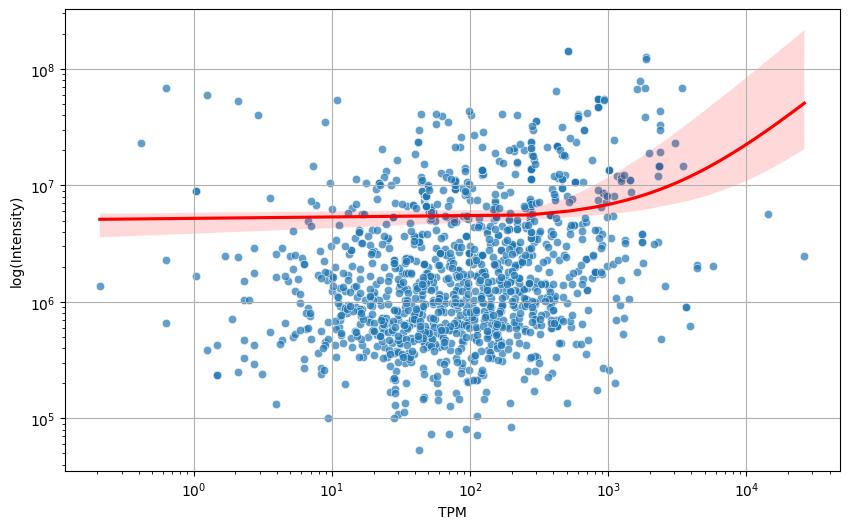

0.13975092705372996
R-squared: 0.019530321612376954


In [15]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named `df`
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TPM', y='total intensity sum', data=combined, alpha=0.7)
sns.regplot(x='TPM', y='total intensity sum', data=combined, scatter=False, color='red')  # Adds a trend line

# Set both axes to logarithmic scale
plt.xscale('log')
plt.yscale('log')

plt.xlabel('TPM')
plt.ylabel('log(Intensity)')

plt.grid(True)
plt.savefig('plots/correlation_protein_transcript_abundance.png', dpi=150)
plt.show()

correlation = combined['total intensity sum'].corr(combined['TPM'])
print(correlation)
r_squared = correlation ** 2
print(f"R-squared: {r_squared}")
